# Initial

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq

## Load the audio files

In [2]:
file1_path = '/content/file1.wav'
file2_path = '/content/file2.wav'

In [3]:
rate1, data1 = wavfile.read(file1_path)
rate2, data2 = wavfile.read(file2_path)

In [4]:
left_channel1 = data1[:, 0]
left_channel2 = data2[:, 0]

# 1. Audio Analysis

## 1.1 Plot the graph

Time arrays

In [5]:
length1 = len(left_channel1) / rate1
length2 = len(left_channel2) / rate2

In [6]:
time1 = np.linspace(0., length1, len(left_channel1))
time2 = np.linspace(0., length2, len(left_channel2))

### Plot in Time Domain

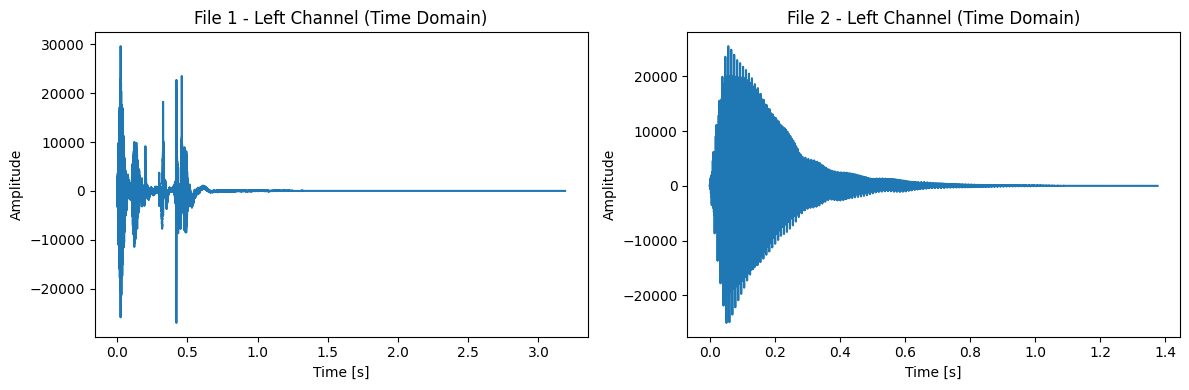

In [7]:
# Plot Time Domain for Left Channel
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# File 1 - Left channel time domain
axs[0].plot(time1, left_channel1)
axs[0].set_title('File 1 - Left Channel (Time Domain)')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')

# File 2 - Left channel time domain
axs[1].plot(time2, left_channel2)
axs[1].set_title('File 2 - Left Channel (Time Domain)')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [8]:
# Fourier Transform for Left Channels
fft_left1 = fftshift(fft(left_channel1))
fft_left2 = fftshift(fft(left_channel2))

In [9]:
# Frequency arrays
freq1 = np.fft.fftfreq(len(left_channel1), 1/rate1)
freq2 = np.fft.fftfreq(len(left_channel2), 1/rate2)

In [10]:
# Shift the zero frequency to center
freq1_shifted = fftshift(freq1)
freq2_shifted = fftshift(freq2)

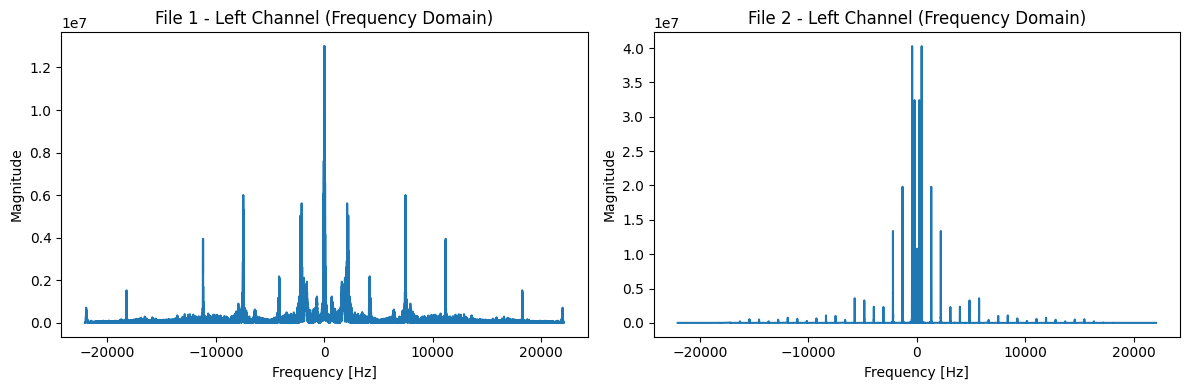

In [11]:
# Plot Frequency Domain for Left Channel
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# File 1 - Left channel frequency spectrum
axs[0].plot(freq1_shifted, np.abs(fft_left1))
axs[0].set_title('File 1 - Left Channel (Frequency Domain)')
axs[0].set_xlabel('Frequency [Hz]')
axs[0].set_ylabel('Magnitude')

# File 2 - Left channel frequency spectrum
axs[1].plot(freq2_shifted, np.abs(fft_left2))
axs[1].set_title('File 2 - Left Channel (Frequency Domain)')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Magnitude')

plt.tight_layout()
plt.show()

### Plot in Frequency Domain

## 1.2 Determine

In [12]:
# Remove the DC component from Left Channel
left_channel1_no_dc = left_channel1 - np.mean(left_channel1)
left_channel2_no_dc = left_channel2 - np.mean(left_channel2)

In [13]:
# Perform Fourier Transform on Left Channel without DC component
fft_left1_no_dc = fft(left_channel1_no_dc)
fft_left2_no_dc = fft(left_channel2_no_dc)

In [14]:
# Frequency arrays
freq1 = fftfreq(len(left_channel1_no_dc), 1/rate1)
freq2 = fftfreq(len(left_channel2_no_dc), 1/rate2)

In [15]:
# Calculate the magnitude of the FFT results
magnitude_left1_no_dc = np.abs(fft_left1_no_dc)
magnitude_left2_no_dc = np.abs(fft_left2_no_dc)

In [16]:
# Set the DC component (0 Hz) to zero to exclude it from being the top value
magnitude_left1_no_dc[0] = 0
magnitude_left2_no_dc[0] = 0

In [17]:
# Only consider positive frequencies (ignore complex conjugate symmetry)
positive_frequencies1 = freq1[:len(freq1)//2]
positive_frequencies2 = freq2[:len(freq2)//2]

positive_magnitudes1 = magnitude_left1_no_dc[:len(magnitude_left1_no_dc)//2]
positive_magnitudes2 = magnitude_left2_no_dc[:len(magnitude_left2_no_dc)//2]

In [18]:
# Indices of the top 3 magnitudes (from positive magnitudes only)
top_indices_1 = np.argsort(positive_magnitudes1)[-3:][::-1]
top_indices_2 = np.argsort(positive_magnitudes2)[-3:][::-1]

In [19]:
# Extract the corresponding frequencies and magnitudes (from positive frequencies and magnitudes)
dominant_frequencies1 = positive_frequencies1[top_indices_1]
dominant_magnitudes1 = positive_magnitudes1[top_indices_1]

dominant_frequencies2 = positive_frequencies2[top_indices_2]
dominant_magnitudes2 = positive_magnitudes2[top_indices_2]

In [20]:
# Print the top 3 dominant frequencies and their magnitudes for each file
print("Top 3 Dominant Frequencies for File 1 (Left Channel):")
for i, (freq, mag) in enumerate(zip(dominant_frequencies1, dominant_magnitudes1)):
    print(f"{i+1}. Frequency: {freq} Hz, Magnitude: {mag}")

print("\nTop 3 Dominant Frequencies for File 2 (Left Channel):")
for i, (freq, mag) in enumerate(zip(dominant_frequencies2, dominant_magnitudes2)):
    print(f"{i+1}. Frequency: {freq} Hz, Magnitude: {mag}")

Top 3 Dominant Frequencies for File 1 (Left Channel):
1. Frequency: 22.884012539184955 Hz, Magnitude: 13001755.662189733
2. Frequency: 23.197492163009407 Hz, Magnitude: 12858416.095286021
3. Frequency: 22.570532915360502 Hz, Magnitude: 12532253.130873803

Top 3 Dominant Frequencies for File 2 (Left Channel):
1. Frequency: 439.706318599822 Hz, Magnitude: 40272927.72672972
2. Frequency: 440.43310590329276 Hz, Magnitude: 39097164.5238111
3. Frequency: 438.9795312963512 Hz, Magnitude: 38940836.737111926


# 2. Hamtaro

## 2.2 Plot

In [21]:
# Define frequency range
omega = np.linspace(-np.pi, np.pi, 1000)

In [22]:
# Compute the frequency response
H = -3 + 2 * np.exp(-1j * omega) - np.exp(1j * omega)

In [23]:
# Compute magnitude and phase
magnitude = np.abs(H)
phase = np.angle(H)

### Plot magnitude

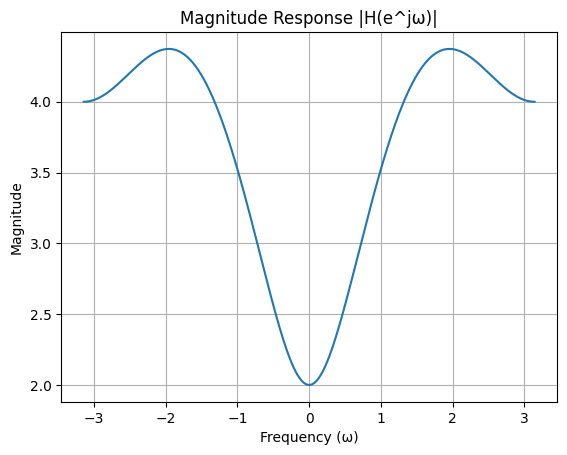

In [24]:
# Plot magnitude response
plt.figure()
plt.plot(omega, magnitude)
plt.title("Magnitude Response |H(e^jω)|")
plt.xlabel("Frequency (ω)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

### Plot phase

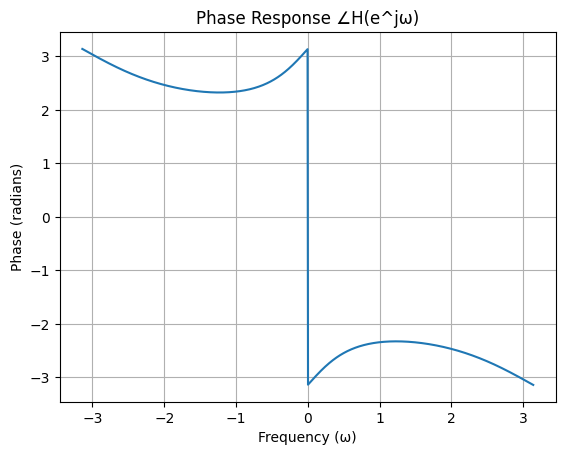

In [25]:
# Plot phase response
plt.figure()
plt.plot(omega, phase)
plt.title("Phase Response ∠H(e^jω)")
plt.xlabel("Frequency (ω)")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.show()

## 2.3

In [26]:
x = np.array([6, 4, 3, 2, 1, 5, 4, 9, 2, 1])

In [27]:
# System equation: y[n] = -3x[n] + 2x[n-1] - x[n+1]
N = len(x)
y = np.zeros(N)

In [28]:
# Apply the system equation
for n in range(N):
    x_n = x[n]
    x_n_minus_1 = x[n-1] if n-1 >= 0 else 0
    x_n_plus_1 = x[n+1] if n+1 < N else 0
    y[n] = -3 * x_n + 2 * x_n_minus_1 - x_n_plus_1

In [29]:
# Compute the DFT of the output sequence
Y = np.fft.fft(y)

In [30]:
# Frequency bins
frequencies = np.fft.fftfreq(N)

<ipython-input-31-b421e1db664a>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, np.abs(Y), use_line_collection=True)


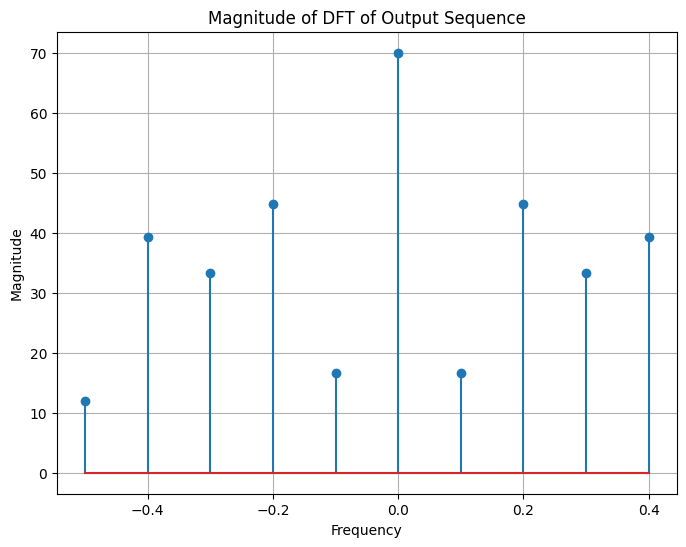

In [31]:
# Plot the magnitude of the DFT
plt.figure(figsize=(8,6))
plt.stem(frequencies, np.abs(Y), use_line_collection=True)
plt.title("Magnitude of DFT of Output Sequence")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

<ipython-input-32-c2084fdf7d6f>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, np.angle(Y), use_line_collection=True)


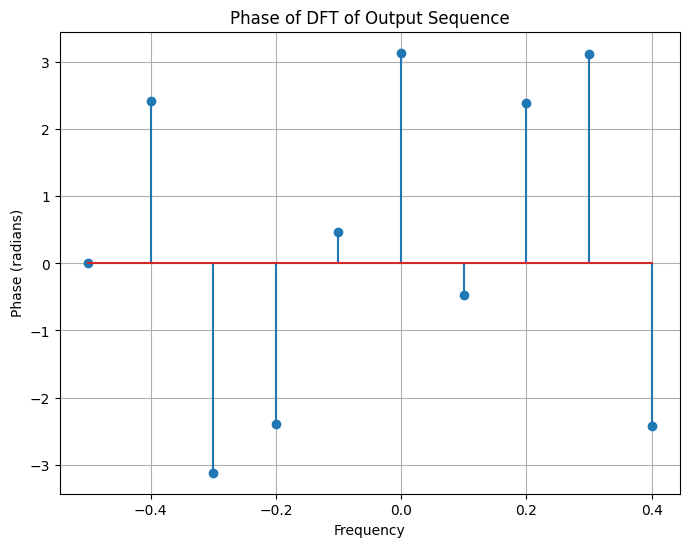

In [32]:
# Plot the phase of the DFT
plt.figure(figsize=(8,6))
plt.stem(frequencies, np.angle(Y), use_line_collection=True)
plt.title("Phase of DFT of Output Sequence")
plt.xlabel("Frequency")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.show()

<ipython-input-34-8b905f41b71b>:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, np.abs(Y), use_line_collection=True)


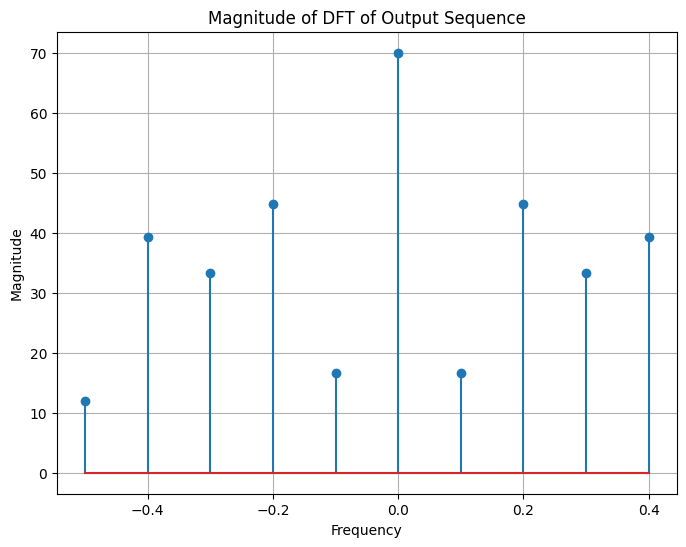

<ipython-input-34-8b905f41b71b>:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, np.angle(Y), use_line_collection=True)


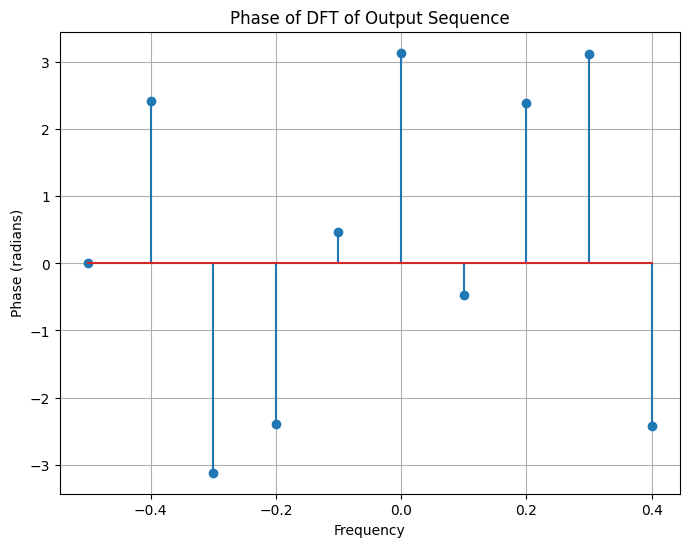

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Output sequence y[n] calculated from system
y = np.array([-22, -3, -3, -1, -4, -17, -11, -21, 11, 1])

# Compute the DFT of the output sequence
Y = np.fft.fft(y)

# Frequency bins
frequencies = np.fft.fftfreq(len(y))

# Plot the magnitude of the DFT
plt.figure(figsize=(8,6))
plt.stem(frequencies, np.abs(Y), use_line_collection=True)
plt.title("Magnitude of DFT of Output Sequence")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# Plot the phase of the DFT
plt.figure(figsize=(8,6))
plt.stem(frequencies, np.angle(Y), use_line_collection=True)
plt.title("Phase of DFT of Output Sequence")
plt.xlabel("Frequency")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.show()


In [36]:
print(Y)

[-70.         +0.j          14.78773076 -7.46969485j
 -32.92705098+30.44632026j -33.28773076 +0.67354196j
 -29.57294902-25.87028378j  12.         +0.j
 -29.57294902+25.87028378j -33.28773076 -0.67354196j
 -32.92705098-30.44632026j  14.78773076 +7.46969485j]
